<a href="https://colab.research.google.com/github/RidouanBani/Pytorch_ML/blob/master/Perceptron1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y= datasets.make_blobs(n_samples=n_pts,random_state=123, centers=centers, cluster_std=0.4)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(100,1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0],X[y==1, 1])

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [6]:
torch.manual_seed(2)
model = Model(2,1)
[w,b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(),b[0].item())

In [7]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1+b1)/-w2
  plt.plot(x1,x2,'r')

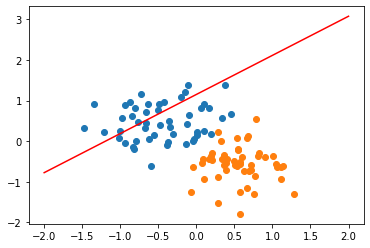

In [8]:
scatter_plot()
plot_fit('linear model')

In [9]:
creterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [11]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = creterion(y_pred,y_data)
  #print("epoch:", i, "loss:",loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

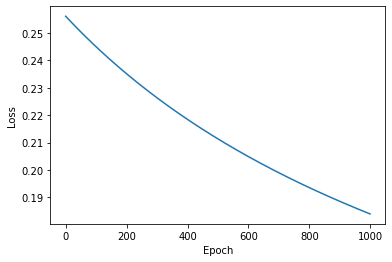

In [12]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

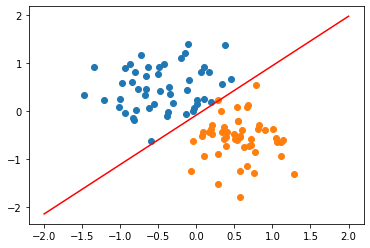

In [15]:
scatter_plot()
plot_fit('Trained Model')